In [1]:
pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error




#pandas is used for data manipulation.
#numpy is used for numerical operations.
#matplotlib and seaborn are for data visualization.
#ARIMA from statsmodels is for time series forecasting.
#mean_squared_error from sklearn is for model evaluation.

# Load the Dataset

In [3]:
# Load dataset
data = pd.read_csv(r'E:\warsaw.csv')

# Display the first few rows
print(data.head())
data.head()



#The dataset is loaded using pd.read_csv().
#Use head() to preview the first few rows of the dataset.

       STATION        NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  \
0  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-01   0.0   
1  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-02   NaN   
2  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-03   0.0   
3  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-04   0.0   
4  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-05   0.0   

   SNWD  TAVG  TMAX  TMIN  
0  10.0  -8.3   NaN   NaN  
1  10.0 -14.9   NaN   NaN  
2  10.0 -13.6  -9.7   NaN  
3  10.0 -10.5  -6.5 -13.3  
4  10.0 -12.0  -8.9 -14.1  


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,1993-01-01,0.0,10.0,-8.3,NaN,NaN
1,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,1993-01-02,NaN,10.0,-14.9,NaN,NaN
2,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,1993-01-03,0.0,10.0,-13.6,-9.7,NaN
3,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,1993-01-04,0.0,10.0,-10.5,-6.5,-13.3
4,PLM00012375,"OKECIE, PL",52.166,20.967,110.3,1993-01-05,0.0,10.0,-12.0,-8.9,-14.1


# Data Exploration and Preprocessing

In [5]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set 'DATE' as the index
data.set_index('DATE', inplace=True)

# Display basic statistics
print(data.describe())




#We check for missing values and drop them if necessary.
#Convert the DATE column to datetime format for time series analysis.
#Set DATE as the index to facilitate time series operations.

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
PRCP         1796
SNWD         9531
TAVG            0
TMAX         3491
TMIN         5084
dtype: int64
           LATITUDE     LONGITUDE     ELEVATION        PRCP        SNWD  \
count  3.630000e+02  3.630000e+02  3.630000e+02  363.000000  363.000000   
mean   5.216600e+01  2.096700e+01  1.103000e+02    1.230579   93.694215   
std    1.209590e-13  1.245166e-13  1.138438e-13    2.659939   93.482575   
min    5.216600e+01  2.096700e+01  1.103000e+02    0.000000   10.000000   
25%    5.216600e+01  2.096700e+01  1.103000e+02    0.000000   25.000000   
50%    5.216600e+01  2.096700e+01  1.103000e+02    0.300000   61.000000   
75%    5.216600e+01  2.096700e+01  1.103000e+02    1.500000  119.000000   
max    5.216600e+01  2.096700e+01  1.103000e+02   29.000000  470.000000   

             TAVG        TMAX        TMIN  
count  363.000000  363.000000  363.000000  
mean    -3.623967   -0.68

# Data Visualization - Time Series Plot

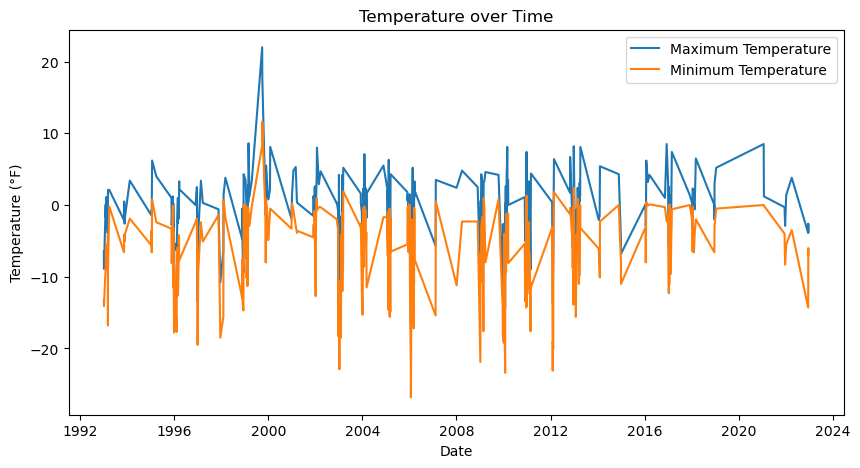

In [7]:
# Plot the temperature data
plt.figure(figsize=(10, 5))
plt.plot(data['TMAX'], label='Maximum Temperature')
plt.plot(data['TMIN'], label='Minimum Temperature')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()




#Plot maximum and minimum temperatures over time to visualize trends.


# Data Visualization - Pie Chart

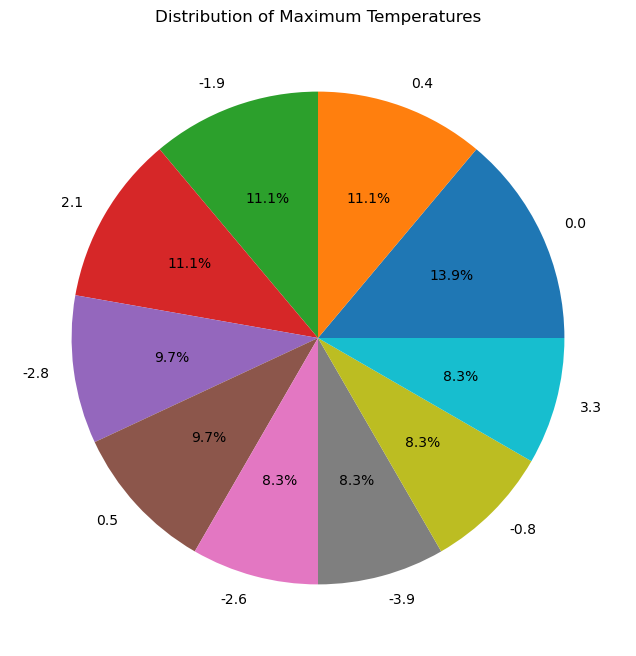

In [9]:
# Distribution of temperatures
temp_distribution = data['TMAX'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(temp_distribution, labels=temp_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Maximum Temperatures')
plt.show()



#A pie chart showing the distribution of the top 10 maximum temperatures.


# Data Visualization - Bar Graph

C:\Users\pradu\AppData\Local\Temp\ipykernel_16180\705674103.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = data['TMAX'].resample('M').mean()


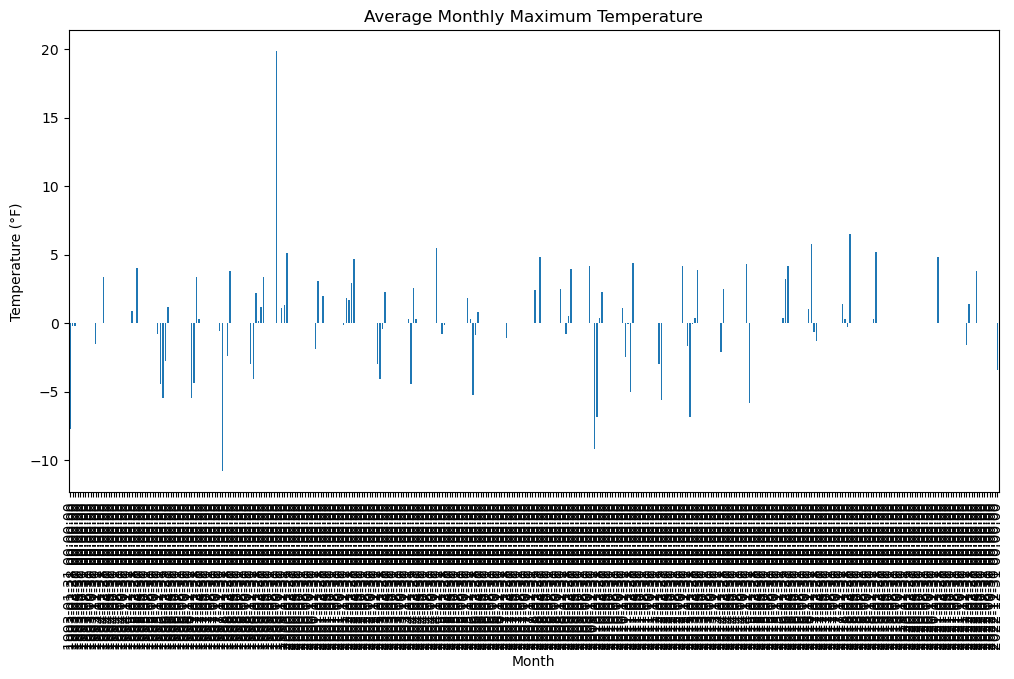

In [11]:
# Average temperature by month
monthly_avg_temp = data['TMAX'].resample('M').mean()

plt.figure(figsize=(12, 6))
monthly_avg_temp.plot(kind='bar')
plt.title('Average Monthly Maximum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.show()



#A bar graph displaying the average monthly maximum temperature.


# Data Visualization - Scatter Plot

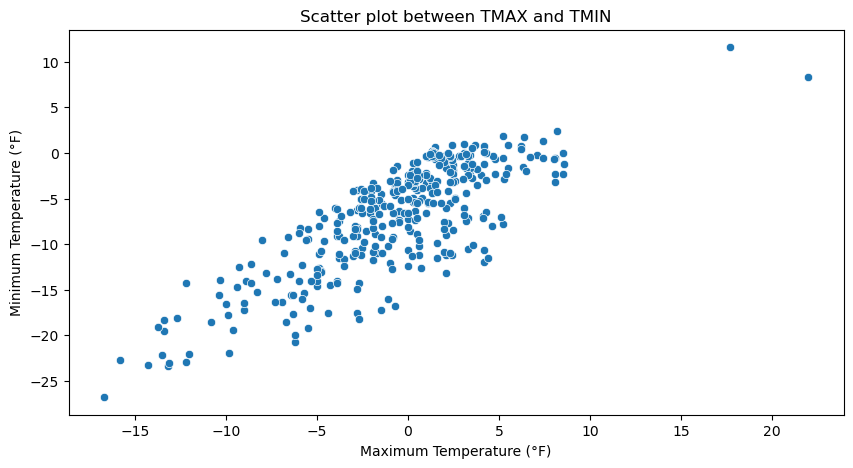

In [13]:
# Scatter plot between TMAX and TMIN
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['TMAX'], y=data['TMIN'])
plt.title('Scatter plot between TMAX and TMIN')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Minimum Temperature (°F)')
plt.show()



#A scatter plot to examine the relationship between maximum and minimum temperatures.


# Splitting Data into Training and Test Sets

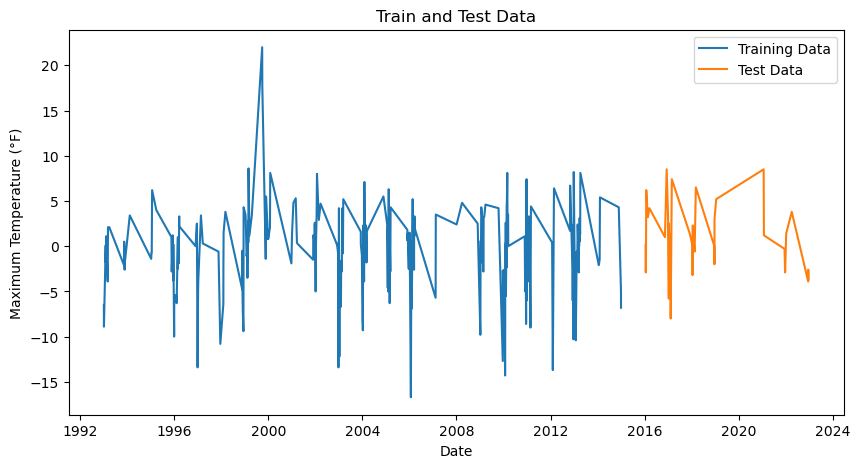

In [15]:
# Split data into training and test sets
train_data = data['TMAX'][:'2015']
test_data = data['TMAX']['2016':]

# Plot training and test data
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.title('Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°F)')
plt.legend()
plt.show()



#The data is split into training and testing sets. Training data is used to build the model, and test data is used for evaluation.


# Building the ARIMA Model

In [17]:
# Build the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())




#An ARIMA model with an order of (5, 1, 0) is built using the training data. The summary provides insights into the model's parameters.


D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   TMAX   No. Observations:                  321
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -943.739
Date:                Fri, 30 Aug 2024   AIC                           1899.479
Time:                        11:07:41   BIC                           1922.089
Sample:                             0   HQIC                          1908.508
                                - 321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4499      0.049     -9.089      0.000      -0.547      -0.353
ar.L2         -0.2907      0.051     -5.646      0.000      -0.392      -0.190
ar.L3         -0.3027      0.058     -5.204      0.0

# Forecasting and Model Evaluation

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


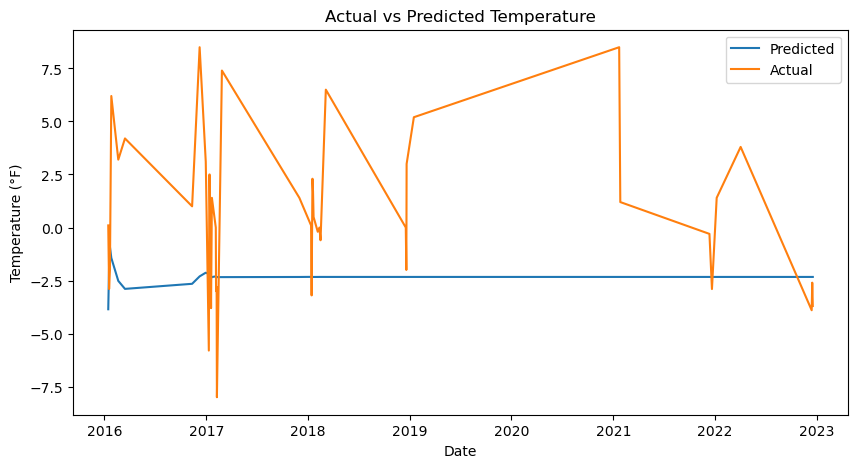

Mean Squared Error: 22.94779093788236


In [19]:
# Forecasting
forecast = model_fit.forecast(steps=len(test_data))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, forecast, label='Predicted')
plt.plot(test_data.index, test_data, label='Actual')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error: {mse}')



#The model forecasts future temperatures, and we compare the predictions with the actual values.
#The mean squared error (MSE) is calculated to evaluate the model's performance.